# Language Translation (English to French)

The main moto of this project is to translate a text from English to French

### Importing Libraries

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Srinivas
[nltk_data]     N\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model


In [ ]:
df_english = pd.read_csv('small_vocab_en.csv', sep = '/t', names = ['english'])
df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'])

<ipython-input-4-09229f3f9239>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_english = pd.read_csv('small_vocab_en.csv', sep = '/t', names = ['english'])
<ipython-input-4-09229f3f9239>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'])


In [ ]:
df = pd.concat([df_english, df_french], axis = 1)
df.head()

,english,french
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


In [ ]:
print("Total English Records = {}".format(len(df['english'])))
print("Total French Records = {}".format(len(df['french'])))

Total English Records = 137860
Total French Records = 137860


### Data Cleaning

In [ ]:
nltk.download('punkt')

nltk.download("stopwords")

[nltk_data] Downloading package punkt to C:\Users\Srinivas
[nltk_data]     N\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Srinivas
[nltk_data]     N\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def remove_punc(x):
  return re.sub('[!#?,.:";]', '', x)

In [ ]:
df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)

In [ ]:
english_words = []
french_words  = []

In [ ]:
def get_label_superset(x, word_list):
    for label in x.split():
        if label not in word_list:
            word_list.append(label)
            
df['english'].apply(lambda x: get_label_superset(x, english_words))
df['french'].apply(lambda x: get_label_superset(x, french_words))

# the number of unique words in english
total_english_words  = len(english_words)
total_english_words



199

In [ ]:
# the number of unique words in french
total_french_words = len(french_words)
total_french_words

350

### Visualization of the data

In [ ]:
words = []
for i in df['english']:
  for word in i.split():
    words.append(word)

words[:13]

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april']

In [ ]:
# Obtain the total count of words
english_words_counts = Counter(words)

In [ ]:
# sort the dictionary by values
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [ ]:
# append the values to a list for visualization purposes
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
  english_words.append(english_words_counts[i][0])
  english_counts.append(english_words_counts[i][1])

In [ ]:
english_words[:10]

['is',
 'in',
 'it',
 'during',
 'the',
 'but',
 'and',
 'sometimes',
 'usually',
 'never']

In [ ]:
english_counts[:10]

[205858, 75525, 75137, 74933, 67628, 63987, 59850, 37746, 37507, 37500]

In [ ]:
fig = px.bar(x = english_words, y = english_counts)
fig.show()

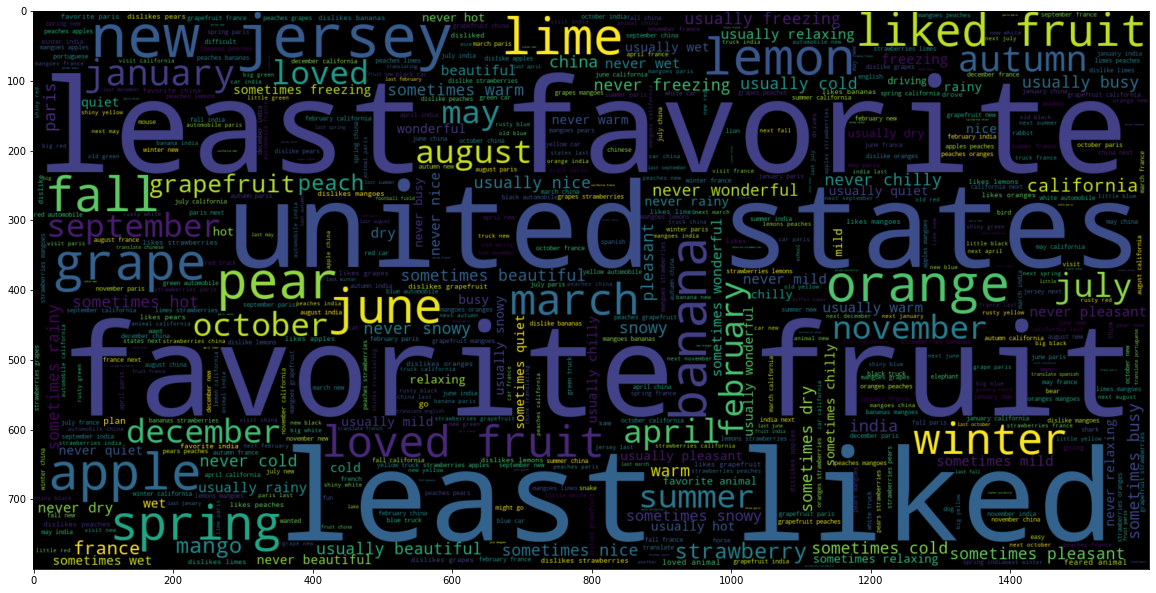

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.english))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
df.english[0]
nltk.word_tokenize(df.english[0])

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april']

In [ ]:
# Maximum length (number of words) per document.
maxlen_english = -1
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)
print("The maximum number of words in any document = ", maxlen_english)

The maximum number of words in any document =  15


In [ ]:
# obtain the count of french words
words = []
for i in df['french']:
  for word in i.split():
    words.append(word)

words[:15]

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 "l'",
 'automne',
 'et',
 'il',
 'est',
 'neigeux',
 'en',
 'avril',
 'les']

In [ ]:
french_words_counts = Counter(words)

In [ ]:
# sort the dictionary by values
french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [ ]:
# append the values to a list for visuaization purpose
french_words = []
french_counts = []
for i in range(len(french_words_counts)):
  french_words.append(french_words_counts[i][0])
  french_counts.append(french_words_counts[i][1])

In [ ]:
french_words[:10]

['est', 'en', 'il', 'les', 'mais', 'et', 'la', 'parfois', 'jamais', 'le']

In [ ]:
french_counts[:10]

[196809, 105768, 84079, 65255, 63987, 59851, 49861, 37746, 37215, 35306]

In [ ]:
fig = px.bar(x = french_words, y = french_counts)
fig.show()

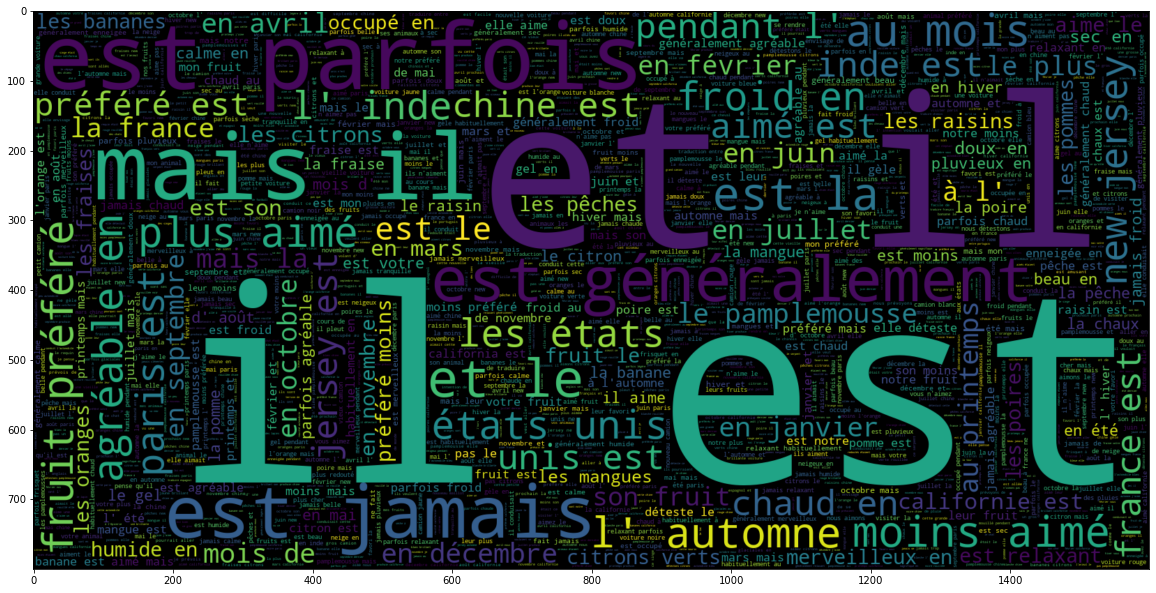

In [ ]:
# plot the word cloud for French
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df.french))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
# Maximum length (number of words) per document.
maxlen_french = -1
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
print("The maximum number of words in any document = ", maxlen_french)

The maximum number of words in any document =  23


### Tokenization and Padding

In [ ]:
def tokenize_and_pad(x, maxlen):
  tokenizer = Tokenizer(char_level = False)
  tokenizer.fit_on_texts(x)
  sequences = tokenizer.texts_to_sequences(x)
  padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')
  return tokenizer, sequences, padded

In [ ]:
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen_french)

In [ ]:
english_vocab_size = total_english_words + 1
print("Complete English Vocab Size:", english_vocab_size)

Complete English Vocab Size: 200


In [ ]:
french_vocab_size = total_french_words + 1
print("Complete French Vocab Size:", french_vocab_size)

Complete French Vocab Size: 351


In [ ]:
print("The tokenized version for document\n", df.english[-1:].item(),"\n is : ", x_padded[-1:])

The tokenized version for document
 the orange is her favorite fruit  but the banana is your favorite  
 is :  [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0]]


In [ ]:
print("The tokenized version for document\n", df.french[-1:].item(),"\n is : ", y_padded[-1:])

The tokenized version for document
 l'orange est son fruit préféré  mais la banane est votre favori  
 is :  [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0]]


In [ ]:
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

In [ ]:
pad_to_text(y_padded[0], y_tokenizer)

"new jersey est parfois calme pendant l' automne et il est neigeux en avril         "

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

### Building and Training the Model

In [ ]:
model = Sequential()

model.add(Embedding(english_vocab_size, 256, input_length = maxlen_english, mask_zero = True))

model.add(LSTM(256))

model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences= True ))
model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 256)           51200     
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 23, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 23, 256)           525312    
_________________________________________________________________
time_distributed (TimeDistri (None, 23, 351)           90207     
Total params: 1,192,031
Trainable params: 1,192,031
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 23, 1)

In [ ]:
model.fit(x_train, y_train, batch_size=1024, validation_split= 0.1, epochs=10)

Train on 111666 samples, validate on 12408 samples
Epoch 1/10
111666/111666 [==============================] - 10s 87us/sample - loss: 0.6090 - accuracy: 0.8237 - val_loss: 0.5919 - val_accuracy: 0.8282
Epoch 2/10
111666/111666 [==============================] - 10s 87us/sample - loss: 0.5563 - accuracy: 0.8386 - val_loss: 0.5551 - val_accuracy: 0.8359
Epoch 3/10
111666/111666 [==============================] - 10s 88us/sample - loss: 0.5097 - accuracy: 0.8516 - val_loss: 0.5599 - val_accuracy: 0.8299
Epoch 4/10
111666/111666 [==============================] - 10s 88us/sample - loss: 0.4688 - accuracy: 0.8640 - val_loss: 0.5303 - val_accuracy: 0.8401
Epoch 5/10
111666/111666 [==============================] - 10s 88us/sample - loss: 0.4266 - accuracy: 0.8769 - val_loss: 0.4306 - val_accuracy: 0.8744
Epoch 6/10
111666/111666 [==============================] - 10s 89us/sample - loss: 0.3839 - accuracy: 0.8898 - val_loss: 0.3744 - val_accuracy: 0.8925
Epoch 7/10
111666/111666 [===========

In [ ]:
model.save("weights.h5")

### Trained Model Performance

In [ ]:
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [ ]:
for i in range(5):

  print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
  print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
  print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - the peach is his favorite fruit but the lime is their favorite   

Original French word - la pêche est son fruit préféré mais la chaux est leur favori           

Predicted French word - la pêche est son fruit préféré mais la chaux est leur favori           




Original English word - the united states is usually busy during november but it is sometimes mild in march

Original French word - les états unis est généralement occupé en novembre mais il est parfois doux en mars        

Predicted French word - les états unis est généralement occupé en novembre mais il est parfois parfois en mars        




Original English word - new jersey is sometimes freezing during may but it is sometimes wonderful in june 

Original French word - new jersey est parfois le gel en mai mais il est parfois merveilleux en juin        

Predicted French word - new jersey est parfois le gel en mai mais il est parfois en en juin        




Original English word - the united states is